<div align="center"><img src="Mobile_logo.png"/></div>

Data fetched from Kaggle: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [1]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

DataTest = pd.read_csv('test.csv')
DataF = pd.read_csv('train.csv')
DataF.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Data dictionary
**battery_power** - Total energy a battery can store in one time measured in mAh \
**blue** - Has bluetooth or not \
**clock_speed** - speed at which microprocessor executes instructions \
**dual_sim** - Has dual sim support or not \
**fc** - Front Camera mega pixels \
**four_g** - Has 4G or not \
**int_memory** - Internal Memory in Gigabytes \
**m_dep** - Mobile Depth in cm \
**mobile_wt** - Weight of mobile phone \
**n_cores** - Number of cores of processor \
**pc** - Primary Camera mega pixels \
**px_height** - Pixel Resolution Height \
**px_width** - Pixel Resolution Width \
**ram** - Random Access Memory in Megabytes \
**sc_h** - Screen Height of mobile in cm \
**sc_w** - Screen Width of mobile in cm \
**talk_time** - longest time that a single battery charge will last when you are talking\
**three_g** - Has 3G or not \
**touch_screen** - Has touch screen or not \
**wifi** - Has wifi or not

In [2]:
DataF.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [3]:
DataF.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

**In this dataset we're going to assign right price_range to mobiles. \
price_range takes only four values: \
    0 - low cost \
    1 - medium cost \
    2 - high cost \
    3 - very high cost**


In [4]:
DataF.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Seems like the data is quite clean, there aren't any missing values**

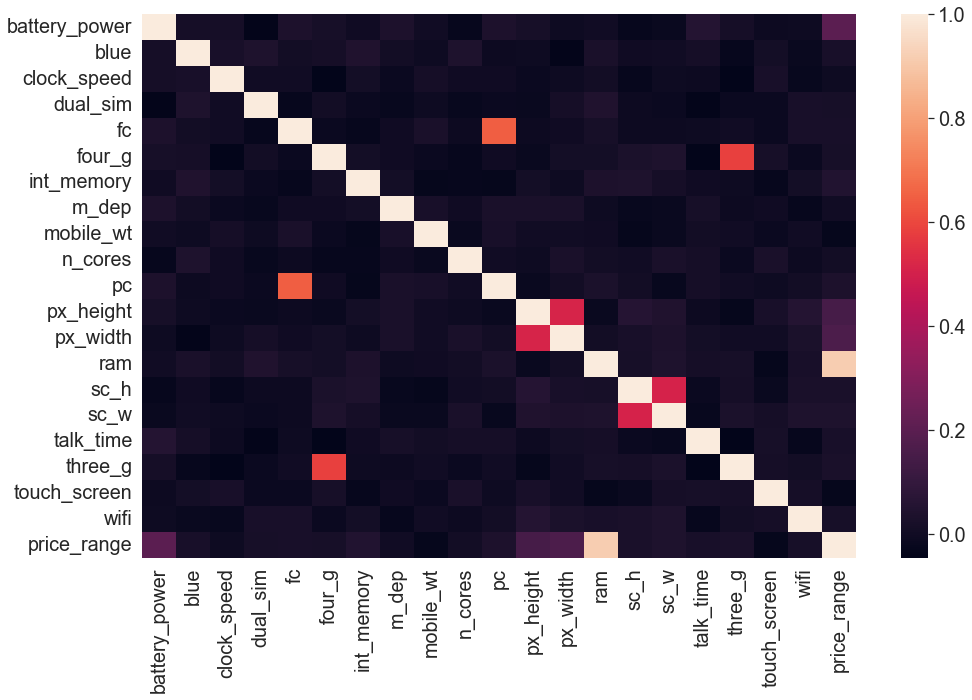

In [5]:
sns.set_theme(style='darkgrid')
sns.set(font_scale=1.8)

plt.subplots(figsize=(16, 10))
sns.heatmap(DataF.corr())
plt.show()

**There is a really strong correlation between price_range and ram. \
Only three more parameters display any noticeable correlation: battery_power, px_height and px_width**

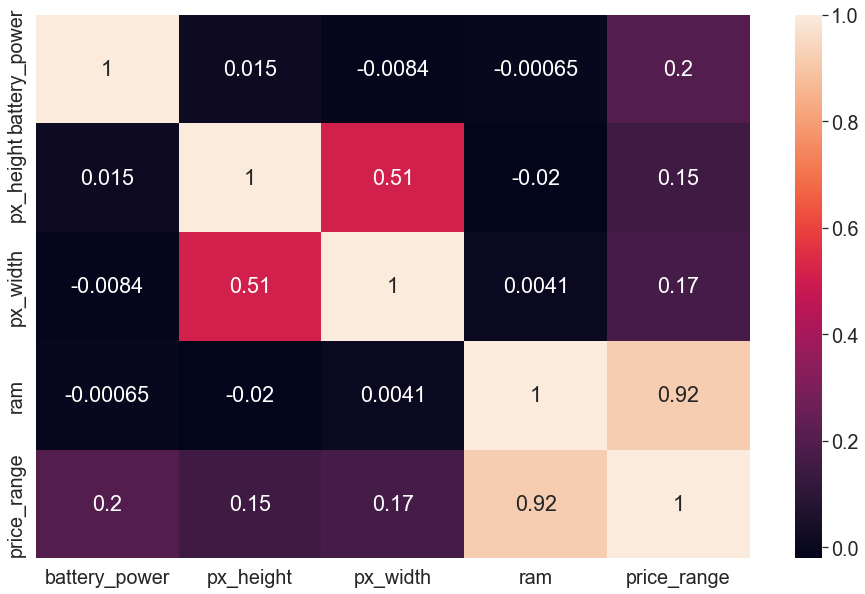

In [6]:
DataF_cut = DataF[[
    'battery_power', 'px_height', 'px_width', 'ram', 'price_range'
]]

plt.subplots(figsize=(16, 10))
sns.heatmap(DataF_cut.corr(), annot=True)
plt.show()

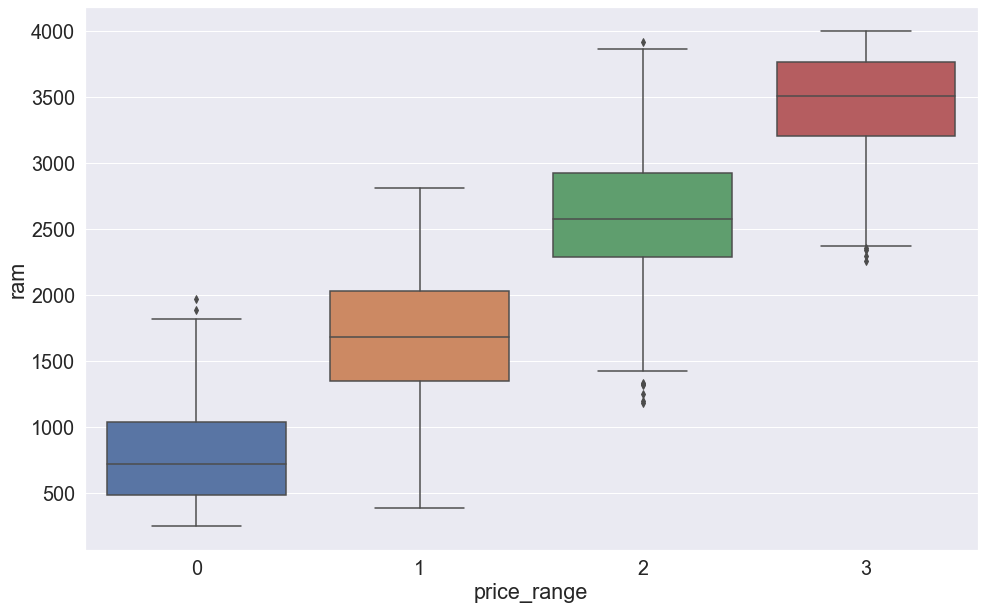

In [7]:
plt.subplots(figsize=(16, 10))
sns.boxplot(x="price_range", y="ram", data=DataF_cut)
plt.show()

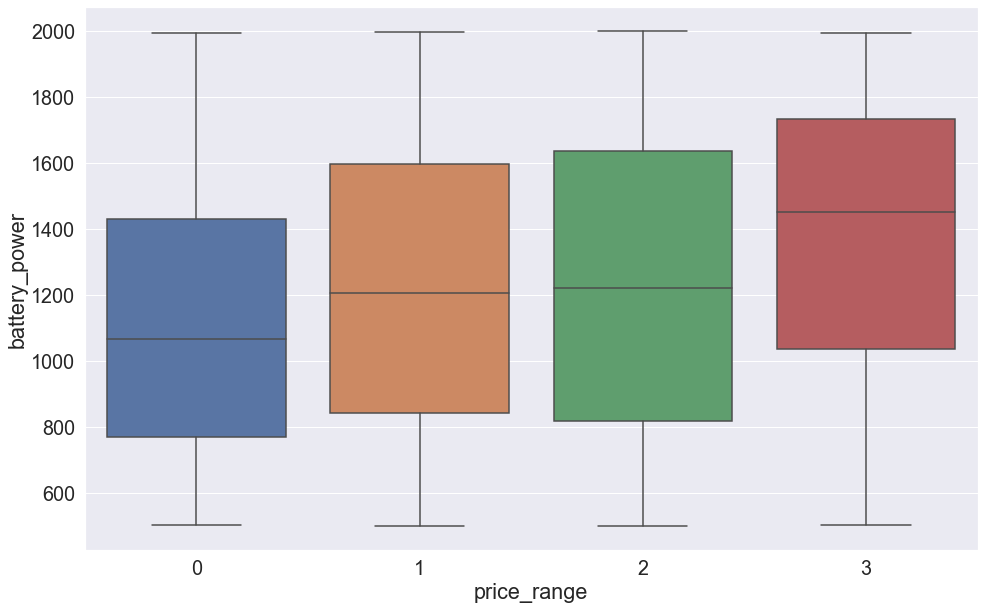

In [8]:
plt.subplots(figsize=(16, 10))
sns.boxplot(x="price_range", y="battery_power", data=DataF_cut)
plt.show()

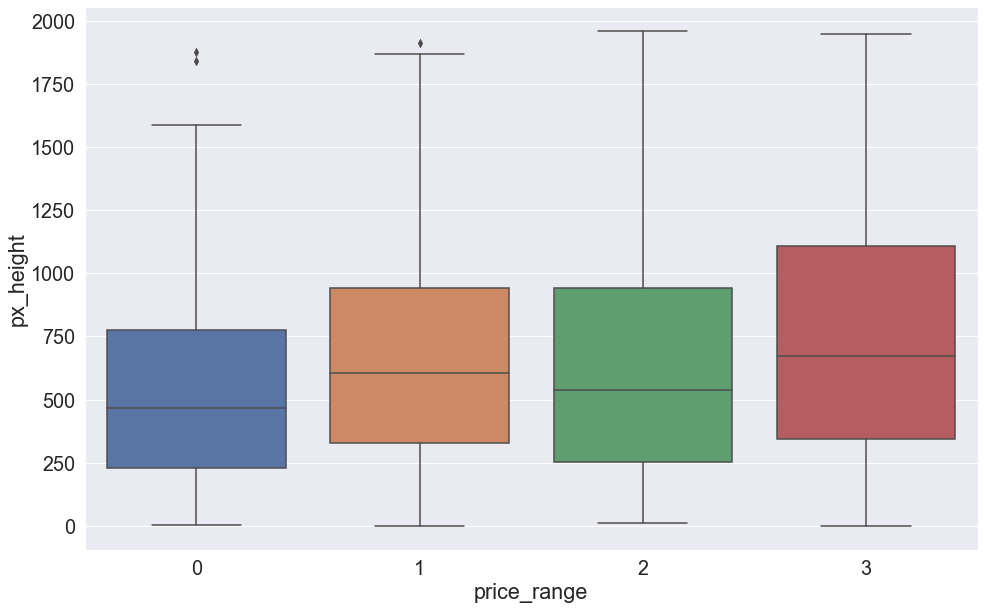

In [9]:
plt.subplots(figsize=(16, 10))
sns.boxplot(x="price_range", y="px_height", data=DataF_cut)
plt.show()

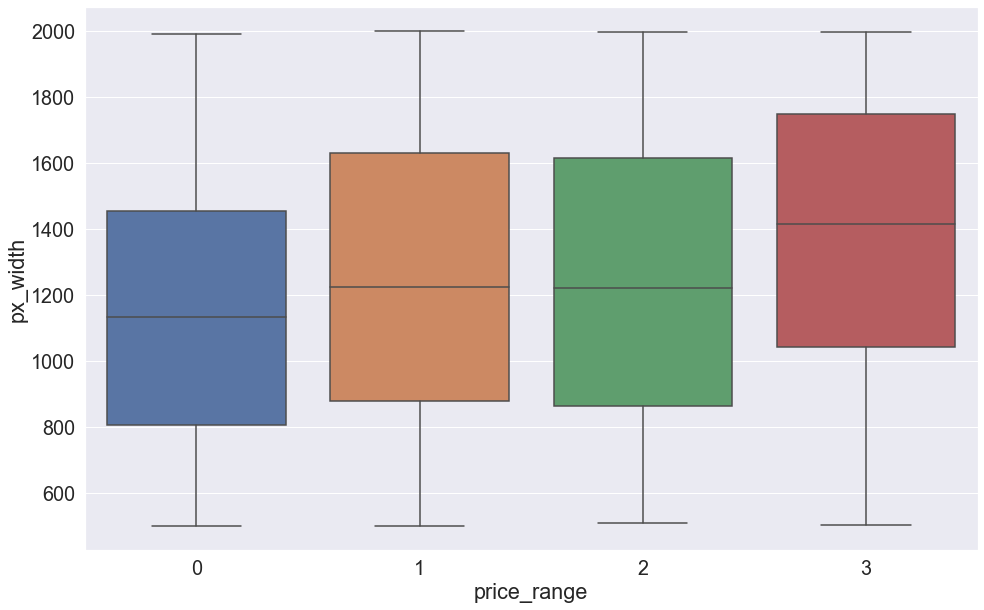

In [10]:
plt.subplots(figsize=(16, 10))
sns.boxplot(x="price_range", y="px_width", data=DataF_cut)
plt.show()

In [11]:
# Splitting data into train & test sets
X = DataF_cut[['battery_power', 'px_height', 'px_width', 'ram']]
y = DataF_cut['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'Test sample count: {X_test.shape[0]}')
print(f'Train sample count: {X_train.shape[0]}')

Test sample count: 400
Train sample count: 1600


In [12]:
# Dictionary for model names and scores
FourColumnScore = {}

In [13]:
# LogisticRegression
log = LogisticRegression(max_iter=300)
log.fit(X_train, y_train.values.ravel())

Log_Regression_score = log.score(X_test, y_test)
FourColumnScore['LogisticRegression'] = Log_Regression_score

In [14]:
# RandomForestClassifier depth=5
RForest5 = RandomForestClassifier(max_depth=5, random_state=0)
RForest5.fit(X_train, y_train.values.ravel())
RForest5_score = RForest5.score(X_test, y_test)
FourColumnScore['RandomForest5'] = RForest5_score

In [15]:
# RandomForestClassifier depth=11
RForest11 = RandomForestClassifier(max_depth=11, random_state=0)
RForest11.fit(X_train, y_train.values.ravel())
RForest11_score = RForest11.score(X_test, y_test)
FourColumnScore['RandomForest11'] = RForest11_score

In [16]:
# GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train.values.ravel())
GNB_score = GNB.score(X_test, y_test)
FourColumnScore['GaussianNB'] = GNB_score

In [17]:
# KNeighborsClassifier (9 neighbors)
KNeigh9 = KNeighborsClassifier(n_neighbors=9)
KNeigh9.fit(X_train, y_train.values.ravel())
KNeigh_score9 = KNeigh9.score(X_test, y_test)
FourColumnScore['KNeighbors9'] = KNeigh_score9

In [18]:
# KNeighborsClassifier (3 neighbors)
KNeigh3 = KNeighborsClassifier(n_neighbors=3)
KNeigh3.fit(X_train, y_train.values.ravel())
KNeigh_score3 = KNeigh3.score(X_test, y_test)
FourColumnScore['KNeighbors3'] = KNeigh_score3

In [19]:
# DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train, y_train.values.ravel())
DTC_score = DTC.score(X_test, y_test)
FourColumnScore['DecisionTree'] = DTC_score

In [20]:
# SVC
SVC_m1 = SVC()
SVC_m1.fit(X_train, y_train.values.ravel())
SVC_m1_score = SVC_m1.score(X_test, y_test)
FourColumnScore['SVC'] = SVC_m1_score

In [21]:
# GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0)
GBC.fit(X_train, y_train.values.ravel())
GBC_score = GBC.score(X_test, y_test)
FourColumnScore['GradientBoosting'] = GBC_score

In [22]:
print(FourColumnScore)

{'LogisticRegression': 0.975, 'RandomForest5': 0.9, 'RandomForest11': 0.935, 'GaussianNB': 0.8175, 'KNeighbors9': 0.945, 'KNeighbors3': 0.935, 'DecisionTree': 0.88, 'SVC': 0.9725, 'GradientBoosting': 0.9475}


**Majority of the scores are decent. What would happen if all columns were used instead of only four for classification?**

In [23]:
# Splitting data into train & test sets
X = DataF.loc[:, DataF.columns != 'price_range']
y = DataF['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'Test sample count: {X_test.shape[0]}')
print(f'Train sample count: {X_train.shape[0]}')

Test sample count: 400
Train sample count: 1600


In [24]:
# Dictionary for model names and scores
AllColumnScore = {}  #Different dictionary

# LogisticRegression
log = LogisticRegression(
    solver='saga', max_iter=30000)  #Different solver and increased max_iter
log.fit(X_train, y_train)

Log_Regression_score = log.score(X_test, y_test)
AllColumnScore['LogisticRegression'] = Log_Regression_score

# RandomForestClassifier depth=5
RForest5 = RandomForestClassifier(max_depth=5, random_state=0)
RForest5.fit(X_train, y_train.values.ravel())
RForest5_score = RForest5.score(X_test, y_test)
AllColumnScore['RandomForest5'] = RForest5_score

# RandomForestClassifier depth=11
RForest11 = RandomForestClassifier(max_depth=11, random_state=0)
RForest11.fit(X_train, y_train.values.ravel())
RForest11_score = RForest11.score(X_test, y_test)
AllColumnScore['RandomForest11'] = RForest11_score

# GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train.values.ravel())
GNB_score = GNB.score(X_test, y_test)
AllColumnScore['GaussianNB'] = GNB_score

# KNeighborsClassifier (9 neighbors)
KNeigh9 = KNeighborsClassifier(n_neighbors=9)
KNeigh9.fit(X_train, y_train.values.ravel())
KNeigh_score9 = KNeigh9.score(X_test, y_test)
AllColumnScore['KNeighbors9'] = KNeigh_score9

# KNeighborsClassifier (3 neighbors)
KNeigh3 = KNeighborsClassifier(n_neighbors=3)
KNeigh3.fit(X_train, y_train.values.ravel())
KNeigh_score3 = KNeigh3.score(X_test, y_test)
AllColumnScore['KNeighbors3'] = KNeigh_score3

# DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train, y_train.values.ravel())
DTC_score = DTC.score(X_test, y_test)
AllColumnScore['DecisionTree'] = DTC_score

# SVC
SVC_m2 = SVC()
SVC_m2.fit(X_train, y_train.values.ravel())
SVC_m2_score = SVC_m2.score(X_test, y_test)
AllColumnScore['SVC'] = SVC_m2_score

# GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100,
                                 learning_rate=1.0,
                                 max_depth=1,
                                 random_state=0)
GBC.fit(X_train, y_train.values.ravel())
GBC_score = GBC.score(X_test, y_test)
AllColumnScore['GradientBoosting'] = GBC_score

In [25]:
print(AllColumnScore)

{'LogisticRegression': 0.715, 'RandomForest5': 0.8475, 'RandomForest11': 0.875, 'GaussianNB': 0.82, 'KNeighbors9': 0.915, 'KNeighbors3': 0.9025, 'DecisionTree': 0.8475, 'SVC': 0.94, 'GradientBoosting': 0.92}


**Looks like there are some interesting changes**

In [26]:
Score_comparison = pd.DataFrame.from_dict([FourColumnScore, AllColumnScore
                                           ]).rename(index={
                                               0: 'FourColumnScore',
                                               1: 'AllColumnScore'
                                           })
Score_comparison

,LogisticRegression,RandomForest5,RandomForest11,GaussianNB,KNeighbors9,KNeighbors3,DecisionTree,SVC,GradientBoosting
FourColumnScore,0.975,0.9000,0.935,0.8175,0.945,0.9350,0.8800,0.9725,0.9475
AllColumnScore,0.715,0.8475,0.875,0.8200,0.915,0.9025,0.8475,0.9400,0.9200


1. Logistic Regression works greatly when used with selected few columns of higher significance, but when presented with the whole dataset - results get disappointing
2. Random Forest has a larger difference of score depending on set max_depth - its increase also raises the score in both column sets, however high max_depth increases memory consumption
3. GaussianNB gives the worst scores of all selected models except Logistic Regression in AllColumnScore
4. KNeighbors was a really potent model, giving great results in both column sets
5. Decision Tree gives decent scores
6. SVC quite often gives the highest scores
7. Gradient Boosting gives great scores, in both cases

Looks like SVC is the best option for a simple classification, granting highest scores - even without the need of selecting only the most significant data. \
**Time to use SVC to predict price_range in test.csv dataset**

In [27]:
DataTest.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In this dataset the price_range column is missing, but there is a new column - id. Lets just leave it for now.

In [28]:
DataTest.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [29]:
DataTest.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Test data is also clean \
Lets use SVC_m1 <- SVC model with only four selected columns for classification

In [30]:
DataTest_cut = DataTest[['battery_power', 'px_height', 'px_width', 'ram']]
Predicted_price = SVC_m1.predict(DataTest_cut)
Predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [31]:
DataTest['price_range'] = Predicted_price
DataTest.to_csv('DataTest_Predicted.csv', index=False)
DataTest.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
